In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_image='D:/Documents/Capstone/Project -2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 shear_range=0.1,
                                vertical_flip=False)

In [4]:
training_set=train_datagen.flow_from_directory(train_image,
                                              target_size=(224,224),
                                              class_mode='categorical',
                                              batch_size=5)

Found 47454 images belonging to 35 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 zoom_range=0.2)

test_set=test_datagen.flow_from_directory('D:/Documents/Capstone/Project -2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
                                              target_size=(224,224),
                                              class_mode='categorical',
                                              batch_size=5)

Found 14321 images belonging to 35 classes.


In [6]:
base_model = tf.keras.applications.InceptionResNetV2(
                     include_top=False,
                     weights='imagenet',
                     input_shape=(224,224,3)
                     )
 
base_model.trainable=False
 
model = tf.keras.Sequential([
        base_model,  
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(35, activation='softmax')
    ])

In [7]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.TruePositives()])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 5, 5, 1536)       54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 5, 5, 1536)       10752     
 tchNormalization)                                               
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                        

In [9]:
early = tf.keras.callbacks.EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)

In [10]:
batch_size=512
STEP_SIZE_TRAIN = training_set.n//training_set.batch_size
STEP_SIZE_VALID = test_set.n//test_set.batch_size

# fit model
history = model.fit(training_set, steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test_set,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=8,
                    callbacks=[early])

Epoch 1/8
9490/9490 [==============================] - 12731s 1s/step - loss: 0.5677 - accuracy: 0.8266 - auc: 0.9891 - precision: 0.8799 - recall: 0.7898 - true_positives: 37477.0000 - val_loss: 5.6723 - val_accuracy: 0.5986 - val_auc: 0.8547 - val_precision: 0.6151 - val_recall: 0.5784 - val_true_positives: 8283.0000
Epoch 2/8
9490/9490 [==============================] - 6735s 710ms/step - loss: 0.3217 - accuracy: 0.9001 - auc: 0.9946 - precision: 0.9209 - recall: 0.8833 - true_positives: 41910.0000 - val_loss: 6.6897 - val_accuracy: 0.6146 - val_auc: 0.8531 - val_precision: 0.6293 - val_recall: 0.5990 - val_true_positives: 8578.0000
Epoch 3/8
9490/9490 [==============================] - 8385s 884ms/step - loss: 0.2705 - accuracy: 0.9179 - auc: 0.9953 - precision: 0.9333 - recall: 0.9062 - true_positives: 42998.0000 - val_loss: 8.3463 - val_accuracy: 0.6257 - val_auc: 0.8493 - val_precision: 0.6370 - val_recall: 0.6168 - val_true_positives: 8832.0000
Epoch 4/8
9490/9490 [============

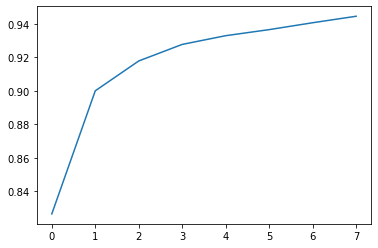

In [11]:
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'])
pyplot.show()